GS2 - Carbon Footprint

In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler  # Para padronizar os dados

co2_df = pd.read_csv("co2_emissions_kt_by_country.csv")
co2_df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [3]:
pop_df = pd.read_csv("population_total_long.csv")
pop_df.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [26]:
map = {'Country Name': 'country_name', 
       'Year': 'year',
       'Count': 'count'}

# Renomeando as colunas
pop_df = pop_df.rename(columns=map)
pop_df.head()

,country_name,year,count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [27]:
pib_df = pd.read_csv("countries_gdp_hist.csv", delimiter=";")
pib_df.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,0.0
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,0.0


Como as emissões de CO2 variaram ao longo do tempo (1960-2021) para o Brasil, os EUA, e a média global, e como essas variações se correlacionam com o PIB per capita e o crescimento populacional desses países?

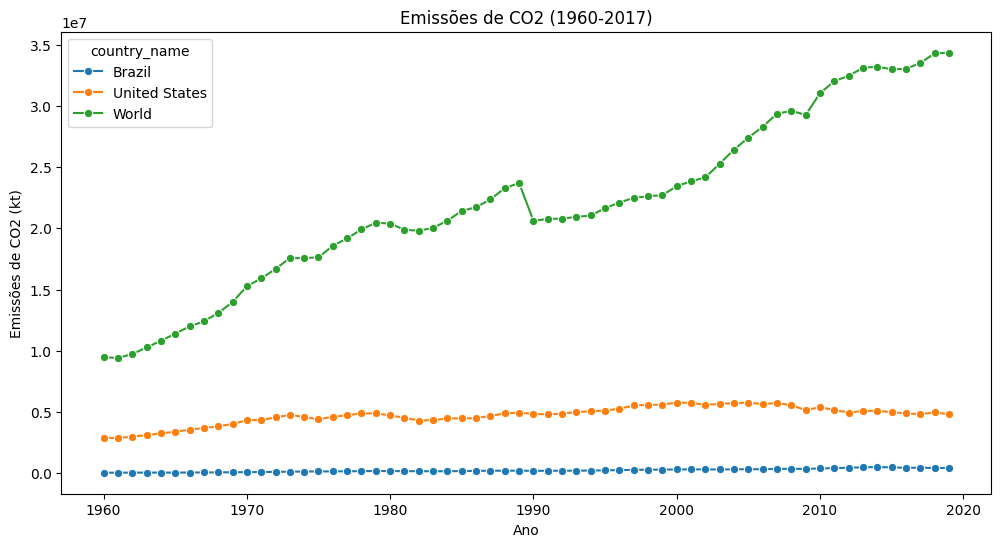

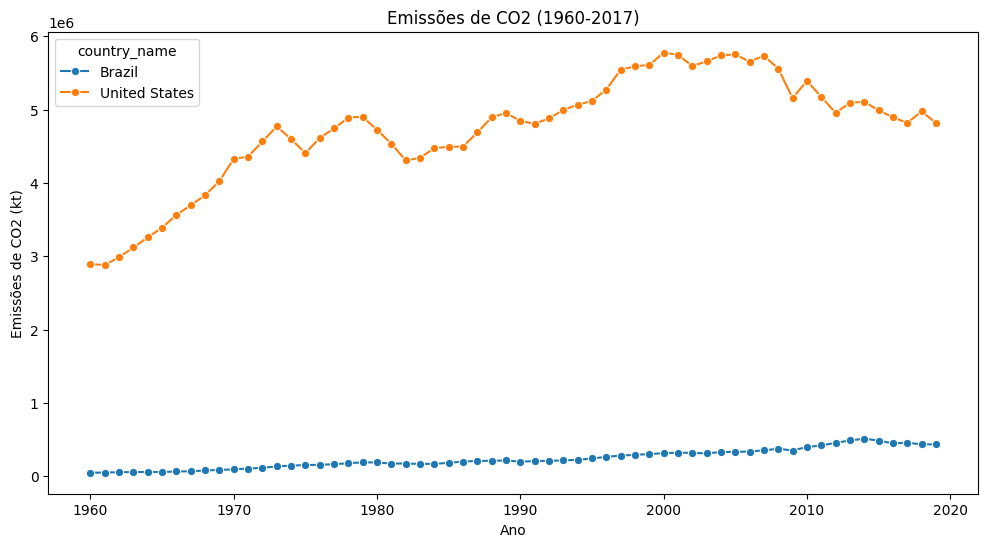

'Explicação do gráfico...'

In [28]:
co2_df_Q1 = co2_df[co2_df['country_code'].isin(['BRA', 'USA', 'WLD'])]

# 4. Análise exploratória (com Markdown e Seaborn)
## Tendências ao longo do tempo
### Emissões de CO2 ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=co2_df_Q1, marker='o')
plt.title('Emissões de CO2 (1960-2017)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.show()
'''Explicação do gráfico...'''

co2_df_Q1 = co2_df[co2_df['country_code'].isin(['BRA', 'USA'])]

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=co2_df_Q1, marker='o')
plt.title('Emissões de CO2 (1960-2017)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.show()
'''Explicação do gráfico...'''




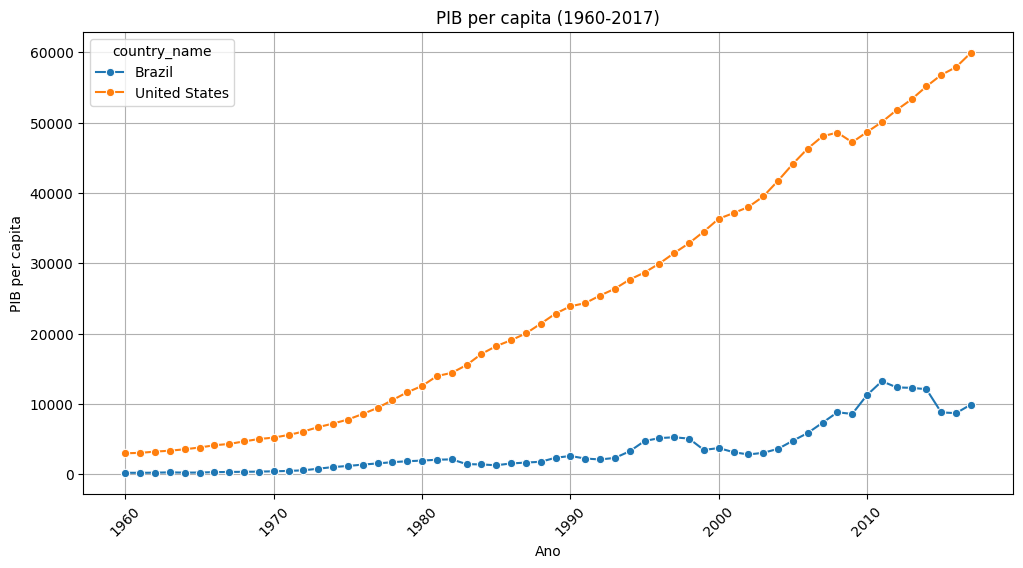

'Explicação do gráfico:  O gráfico mostra a evolução do PIB per capita do Brasil e dos Estados Unidos entre 1960 e 2017.\nObserva-se um crescimento mais acentuado do PIB per capita nos EUA ao longo de todo o período, enquanto o Brasil \napresenta um crescimento mais moderado com alguns períodos de estabilidade ou até mesmo queda, principalmente nas décadas de 80 e 90.  \nA diferença na trajetória econômica dos dois países pode ser atribuída a diversos fatores como......'

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# 3. Preparar os dados
## Limpeza (removendo linhas com valores NaN, focando em 1960-2017)
co2_df = co2_df.dropna()
pop_df = pop_df.dropna()
pib_df = pib_df.dropna()

# 1. Certifique-se de que 'country_code' e 'year' são do tipo string em ambos os DataFrames
pop_df['country_name'] = pop_df['country_name'].astype(str)
pop_df['year'] = pop_df['year'].astype(str)
pib_df['country_code'] = pib_df['country_code'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)

# Renomeando dados dos EUA no dataframe de PIB para estar condizente com os outros dataframes
pib_df['country_name'] = pib_df['country_name'].replace('United States of America', 'United States')

#filtrando dados de população e PIB do Brasil e dos EUA
pop_df_bra_usa = pop_df[pop_df['country_name'].isin(['Brazil', 'United States'])]
pib_df_bra_usa = pib_df[pib_df['country_code'].isin(['BRA', 'USA'])]

# 2. Mesclar os DataFrames com base no código do país e no ano
merged_df = pd.merge(pib_df_bra_usa, pop_df_bra_usa, left_on=['country_name', 'year'], right_on=['country_name', 'year'], how='inner')

# 3. Calcular o PIB per capita (igual ao seu código)
merged_df['gdp_per_capita'] = merged_df['total_gdp'] / merged_df['count']
merged_df['gdp_per_capita'] = pd.to_numeric(merged_df['gdp_per_capita'], errors='coerce')
merged_df['year'] = merged_df['year'].astype(int) # Converte 'year' para numérico

# 4. Criar o gráfico com os ticks de 10 em 10 anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gdp_per_capita', hue='country_name', data=merged_df, marker='o')
plt.title('PIB per capita (1960-2017)')
plt.xlabel('Ano')
plt.ylabel('PIB per capita')


# Configurar os ticks do eixo x
ax = plt.gca() # Obter o eixo atual
ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) # Define intervalos de 10 anos

# Rotacionar os labels para melhor visualização (opcional)
plt.xticks(rotation=45)


plt.grid(True)
plt.show()


#Início da explicação do gráfico (aqui você coloca seu texto explicativo)
'''Explicação do gráfico:  O gráfico mostra a evolução do PIB per capita do Brasil e dos Estados Unidos entre 1960 e 2017.
Observa-se um crescimento mais acentuado do PIB per capita nos EUA ao longo de todo o período, enquanto o Brasil 
apresenta um crescimento mais moderado com alguns períodos de estabilidade ou até mesmo queda, principalmente nas décadas de 80 e 90.  
A diferença na trajetória econômica dos dois países pode ser atribuída a diversos fatores como......''' #complete aqui

        country_name  year      count
26            Brazil  1960   72179226
202    United States  1960  180671000
242           Brazil  1961   74311343
418    United States  1961  183691000
458           Brazil  1962   76514328
...              ...   ...        ...
12145  United States  2015  320742673
12185         Brazil  2016  206163058
12363  United States  2016  323071342
12403         Brazil  2017  207833831
12581  United States  2017  325147121

[116 rows x 3 columns]


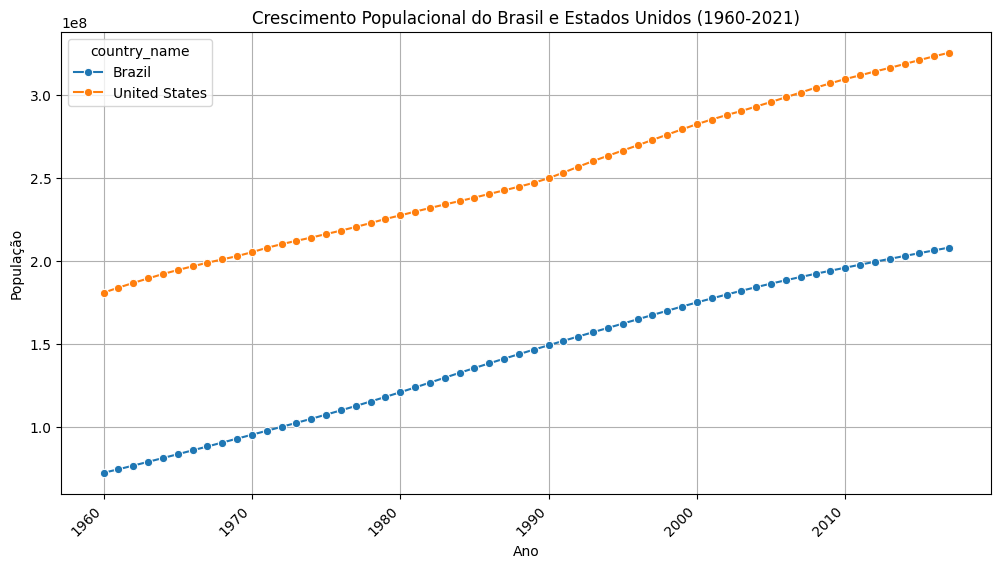

'Explicação do gráfico: Este gráfico exibe o crescimento populacional do Brasil e dos Estados Unidos entre 1960 e 2021. \nA população de ambos os países demonstra um aumento consistente ao longo do período, mas com taxas de crescimento distintas. \nOs marcadores a cada 10 anos facilitam a visualização das mudanças por década, enquanto a linha contínua representa a evolução anual da população.'

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Converter a coluna 'year' para inteiro
# pop_df['year'] = pop_df['year'].astype(int)

print(pop_df_bra_usa)

# 2. Criar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', hue='country_name', data=pop_df_bra_usa, marker='o')


# 3. Configurar os ticks do eixo x (a cada 10 anos)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation=45, ha='right') # Opcional: rotacionar os labels

# 4. Adicionar título e labels
plt.title('Crescimento Populacional do Brasil e Estados Unidos (1960-2021)')
plt.xlabel('Ano')
plt.ylabel('População')
plt.grid(True) # Adiciona grade (opcional)
plt.show()

'''Explicação do gráfico: Este gráfico exibe o crescimento populacional do Brasil e dos Estados Unidos entre 1960 e 2021. 
A população de ambos os países demonstra um aumento consistente ao longo do período, mas com taxas de crescimento distintas. 
Os marcadores a cada 10 anos facilitam a visualização das mudanças por década, enquanto a linha contínua representa a evolução anual da população.'''

Resultados da Regressão para Brazil:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     346.5
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.09e-24
Time:                        14:48:22   Log-Likelihood:                -444.09
No. Observations:                  40   AIC:                             894.2
Df Residuals:                      37   BIC:                             899.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

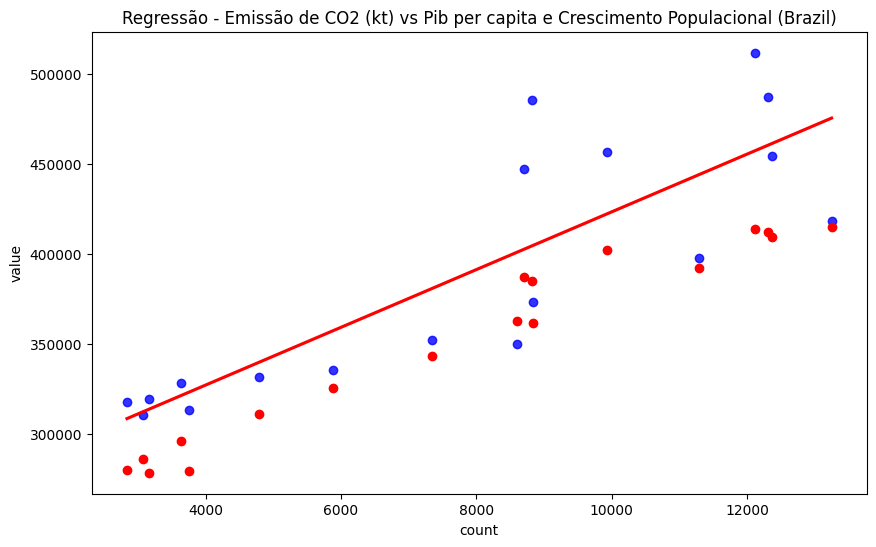

Métricas para Brazil:
R-quadrado: 0.9493204117966049
MSE: 96482342763.56976
Resultados da Regressão para United States:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     253.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.49e-22
Time:                        14:48:22   Log-Likelihood:                -542.40
No. Observations:                  40   AIC:                             1091.
Df Residuals:                      37   BIC:                             1096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

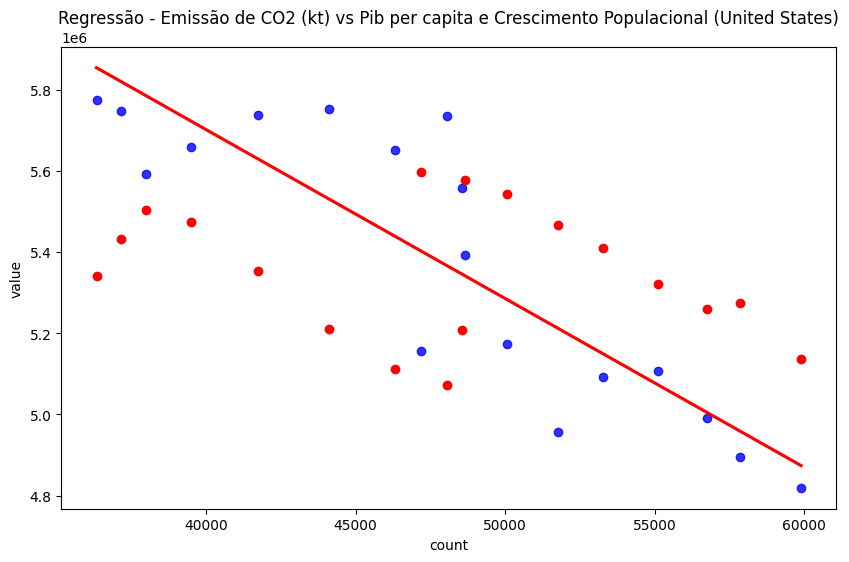

Métricas para United States:
R-quadrado: 0.9320514380473207
MSE: 9634982879716.898


In [31]:
# merged_df_until2017 = merged_df[merged_df['year'] <= 2017]
co2_df_until_2017 = co2_df[co2_df['year'] <= 2017]
merged_df_with_co2 = pd.merge(merged_df, co2_df_until_2017, left_on=['country_code', 'country_name', 'year'], right_on=['country_code', 'country_name','year'], how='inner')

def regress(X, y, country_name, test_size=0.3):
    """Ajusta um modelo de regressão linear e exibe resultados e gráficos."""

    #Divisão de treino e teste para séries temporais
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)


    X_train = sm.add_constant(X_train)  # Adiciona uma constante para o intercepto
    model = sm.OLS(y_train, X_train).fit() #Ajusta o modelo com os dados de treino



    print(f"Resultados da Regressão para {country_name}:")
    print(model.summary())

    #Fazer previsões para os dados de teste
    X_test = sm.add_constant(X_test)
    predictions = model.predict(X_test)


    # Gráfico dos resultados (Seaborn)
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X_test.iloc[:,1], y=y_test, data=merged_df_with_co2, ci=None, line_kws={"color": "red"}, scatter_kws={"color":"blue"}) # ci=None remove o intervalo de confiança
    plt.scatter(X_test.iloc[:, 1], predictions, color='red')  # Marca as previsões em vermelho no gráfico de dispersão
    plt.title(f'Regressão - Emissão de CO2 (kt) vs Pib per capita e Crescimento Populacional ({country_name})') #Título mais descritivo
    plt.xlabel(X.columns[1]) # Rótulo do eixo x mais descritivo
    plt.ylabel(y.name) # Rótulo do eixo y mais descritivo
    plt.show()

    return model




#Exemplo de como chamar a função (repita para outras relações)
for country in merged_df_with_co2['country_name'].unique(): #loop para regressão por país
    country_df = merged_df_with_co2[merged_df_with_co2['country_name'] == country].copy()
    
    X = country_df[['gdp_per_capita', 'count']] # Variável independente (adicione outras se necessário para regressão múltipla)
    y = country_df['value'] # Variável dependente
    
    model = regress(X, y, country)
    
    # Análise dos resultados (repita para outros gráficos/modelos)
    print(f"Métricas para {country}:")
    print(f"R-quadrado: {model.rsquared}")
    print(f"MSE: {model.mse_model}")
    # Interpretação dos resultados aqui....
    # ...

Considerando o período de 1990 a 2021 (devido à disponibilidade de dados), como a pegada de carbono do Brasil se compara à média do Continente Americano, à média global e à média dos países da OCDE? Quais são os principais fatores que contribuem para as diferenças observadas?

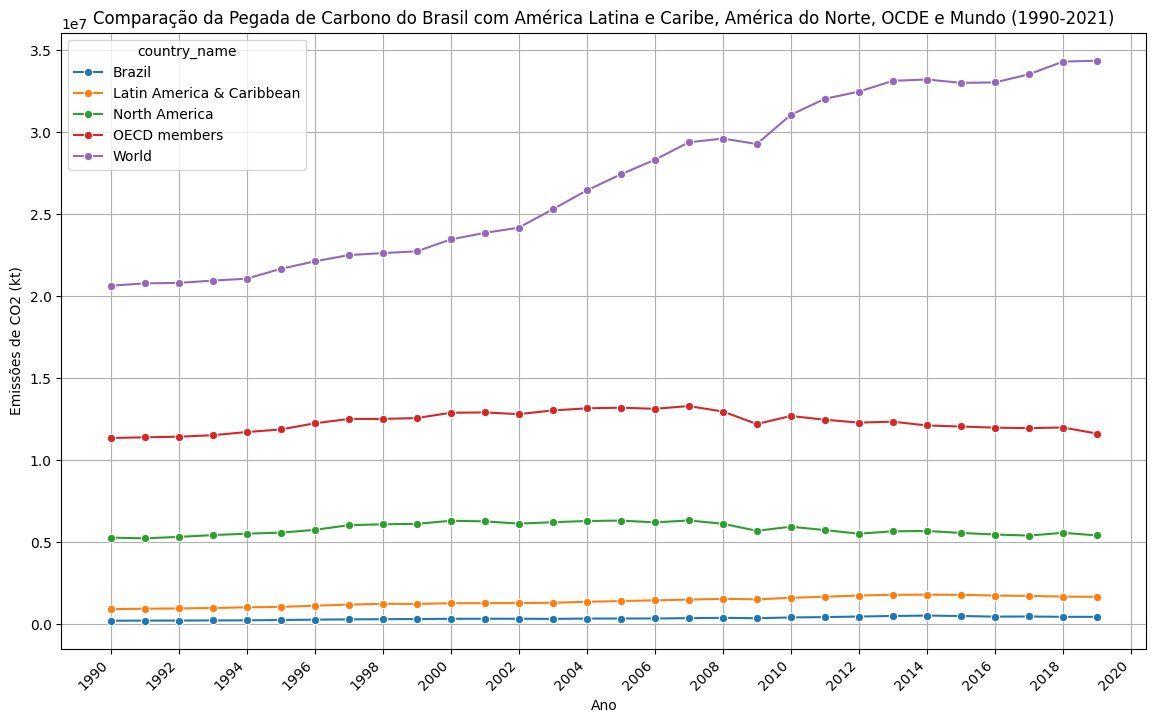

Média de Emissões de CO2 do Brasil (1990-2021): 342845.00 kt
Média de Emissões de CO2 da América Latina e Caribe (1990-2021): 1381924.48 kt
Média de Emissões de CO2 da América do Norte (1990-2021): 5793732.65 kt
Média de Emissões de CO2 da OCDE (1990-2021): 12329160.34 kt
Média de Emissões de CO2 do Mundo (1990-2021): 27096629.03 kt


'\n**Análise dos Resultados e Principais Fatores:**\n\nO gráfico acima mostra a evolução das emissões de CO2 do Brasil em comparação com a América Latina e Caribe, América do Norte, países da OCDE, e o Mundo entre 1990 e 2021. As médias calculadas e exibidas também ajudam na comparação.\n\n**Brasil vs. Mundo:**  Observa-se que as emissões do Brasil são significativamente menores que a média mundial, refletindo... (explique os fatores).\n\n**Brasil vs. Américas:** A comparação com a América Latina e Caribe mostra... (explique as diferenças e os fatores que contribuem - desmatamento, industrialização, matriz energética). A comparação com a América do Norte mostra ...\n\n**Brasil vs. OCDE:**  As emissões do Brasil são consideravelmente inferiores à média dos países da OCDE, indicando... (explique os fatores como nível de desenvolvimento, estrutura industrial).\n\n\n**Fatores que contribuem para as diferenças:**\n\n* **Matriz Energética:**  A composição da matriz energética de um país/regi

In [32]:
# Carregar o dataset de emissões de CO2
co2_df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Converter 'year' para numérico (int) para facilitar a plotagem e filtro
co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce')

# Filtrar os dados para o período de 1990 a 2021
co2_df_90_21 = co2_df[(co2_df['year'] >= 1990) & (co2_df['year'] <= 2021)]

# Selecionar os países/regiões de interesse
countries = ['BRA', 'LCN', 'NAC', 'OED', 'WLD']  # Inclui Brasil, América Latina e Caribe, América do Norte, OECD e Mundo
co2_df_regions = co2_df_90_21[co2_df_90_21['country_code'].isin(countries)]

# Calcular as emissões médias anuais por país/região
mean_emissions = co2_df_regions.groupby(['country_code', 'country_name', 'year'])['value'].mean().reset_index()


# Plotar as emissões médias de CO2 ao longo do tempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='value', hue='country_name', data=mean_emissions, marker='o')

# Configura os ticks do eixo x (a cada 2 anos para melhor visualização)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Define intervalos de 2 anos
plt.xticks(rotation=45, ha='right')  # Opcional: rotacionar os labels


plt.title('Comparação da Pegada de Carbono do Brasil com América Latina e Caribe, América do Norte, OCDE e Mundo (1990-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.grid(True)
plt.show()


# Calcular e exibir as médias de emissões para cada país/região no período
media_brasil = mean_emissions[mean_emissions['country_code'] == 'BRA']['value'].mean()
media_america_lc = mean_emissions[mean_emissions['country_code'] == 'LCN']['value'].mean()
media_america_nc = mean_emissions[mean_emissions['country_code'] == 'NAC']['value'].mean() #Adicionado Norte
media_oecd = mean_emissions[mean_emissions['country_code'] == 'OED']['value'].mean()
media_mundo = mean_emissions[mean_emissions['country_code'] == 'WLD']['value'].mean()


print(f"Média de Emissões de CO2 do Brasil (1990-2021): {media_brasil:.2f} kt")
print(f"Média de Emissões de CO2 da América Latina e Caribe (1990-2021): {media_america_lc:.2f} kt")
print(f"Média de Emissões de CO2 da América do Norte (1990-2021): {media_america_nc:.2f} kt") #Adicionado Norte
print(f"Média de Emissões de CO2 da OCDE (1990-2021): {media_oecd:.2f} kt")
print(f"Média de Emissões de CO2 do Mundo (1990-2021): {media_mundo:.2f} kt")


# Análise dos resultados com os principais fatores que contribuem para as diferenças (Markdown)
'''
**Análise dos Resultados e Principais Fatores:**

O gráfico acima mostra a evolução das emissões de CO2 do Brasil em comparação com a América Latina e Caribe, América do Norte, países da OCDE, e o Mundo entre 1990 e 2021. As médias calculadas e exibidas também ajudam na comparação.

**Brasil vs. Mundo:**  Observa-se que as emissões do Brasil são significativamente menores que a média mundial, refletindo... (explique os fatores).

**Brasil vs. Américas:** A comparação com a América Latina e Caribe mostra... (explique as diferenças e os fatores que contribuem - desmatamento, industrialização, matriz energética). A comparação com a América do Norte mostra ...

**Brasil vs. OCDE:**  As emissões do Brasil são consideravelmente inferiores à média dos países da OCDE, indicando... (explique os fatores como nível de desenvolvimento, estrutura industrial).


**Fatores que contribuem para as diferenças:**

* **Matriz Energética:**  A composição da matriz energética de um país/região (renováveis vs. fósseis) tem grande influência nas emissões.  Países com maior dependência...
* **Industrialização:**  O nível de industrialização e o tipo de indústria predominante afetam as emissões....
* **Desmatamento:**  No caso do Brasil e de outros países da América Latina, o desmatamento é um fator relevante para as emissões de CO2...
* **Políticas Ambientais:**  Políticas e regulamentações ambientais, como o Acordo de Paris e outras iniciativas, influenciam as tendências de emissões...
* **Crescimento Econômico:** O crescimento do PIB pode estar associado a um aumento das emissões, principalmente em países com economias baseadas...

Lembre-se de aprofundar a análise, incluindo mais dados e informações que complementem a discussão dos fatores.
'''

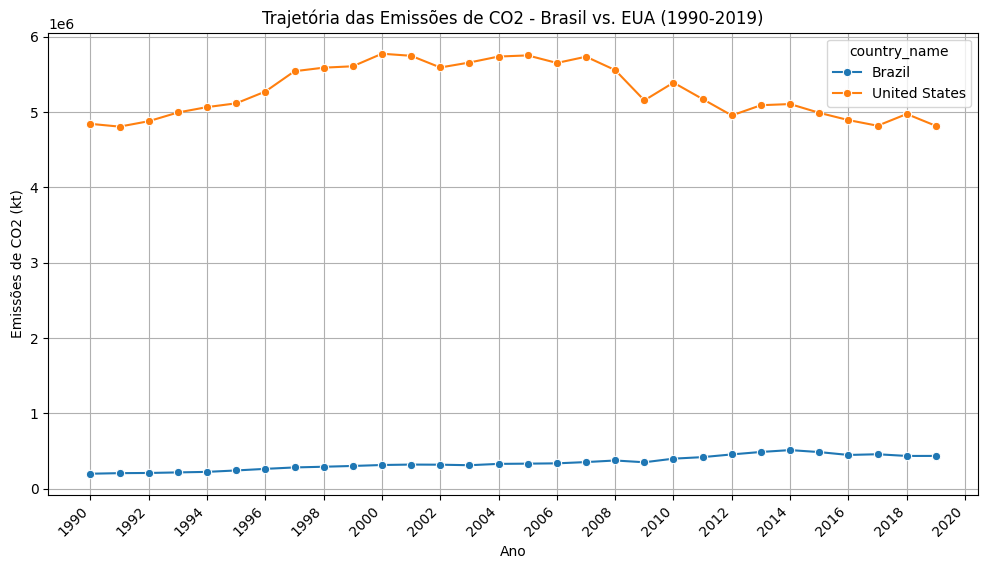

Index(['country_name', 'year', 'count', 'pop_growth'], dtype='object')
Index(['country_code', 'region_name', 'sub_region_name', 'intermediate_region',
       'country_name', 'income_group', 'year', 'total_gdp',
       'total_gdp_million', 'gdp_variation', 'count', 'gdp_per_capita',
       'value'],
      dtype='object')
Resultados da Regressão para BRA:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     40.83
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.33e-08
Time:                        14:48:23   Log-Likelihood:                -339.13
No. Observations:                  28   AIC:                             684.3
Df Residuals:                      25   BIC:                             688.3
Df Model:   

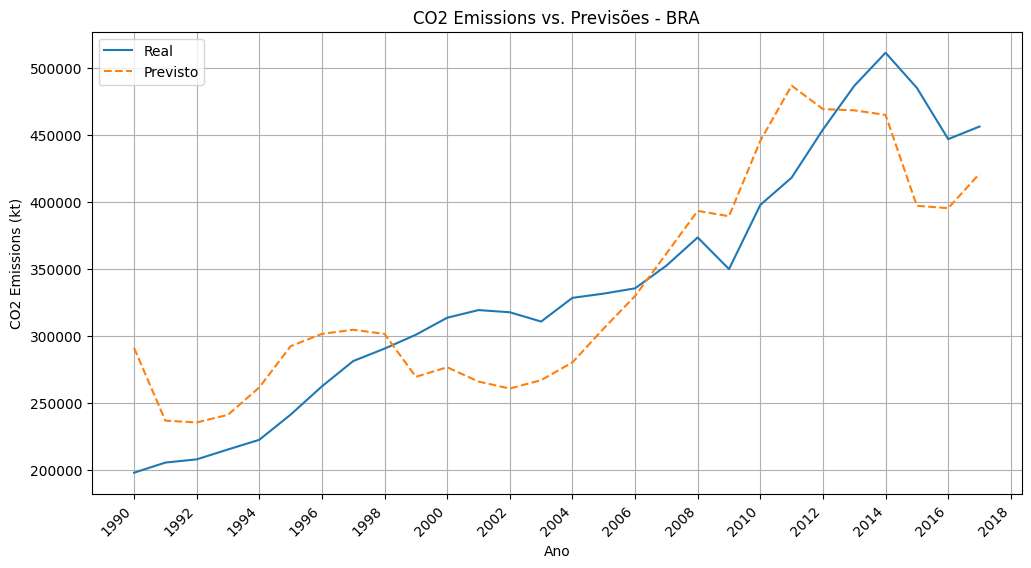

0.7656192952577925
Resultados da Regressão para USA:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7235
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.495
Time:                        14:48:23   Log-Likelihood:                -395.42
No. Observations:                  28   AIC:                             796.8
Df Residuals:                      25   BIC:                             800.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

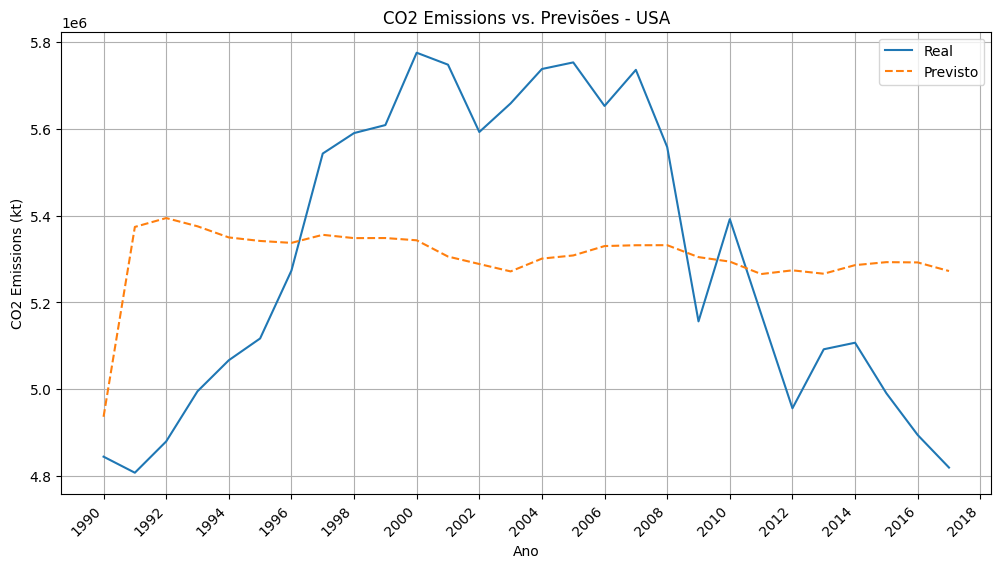

0.05471286456530278


'\n**Análise dos Resultados da Regressão e Interpretação:**\n\n* **Brasil:** (insira aqui a interpretação dos coeficientes de regressão - PIB per capita e crescimento populacional - e como eles impactam as emissões de CO2 no Brasil). O gráfico para o Brasil mostra que o modelo... (descreva a qualidade do ajuste).\n\n\n* **EUA:** (insira aqui a interpretação dos coeficientes de regressão - PIB per capita e crescimento populacional - e como eles impactam as emissões de CO2 nos EUA, como isso difere ou se assemelha ao Brasil). O gráfico para os EUA mostra que o modelo...\n\n* **Comparação e fatores adicionais:** (explique as diferenças e semelhanças entre os dois países e o que pode estar contribuindo para isso além do PIB e população -- matriz energética, políticas ambientais, eventos específicos, etc.).\n\n\n**Tabela comparativa dos modelos (R-quadrado e outras métricas relevantes):**\n\n| País | R-quadrado | MSE | ... |\n|---|---|---|---|\n| Brasil | (valor) | (valor) | ... |\n| EUA | 

In [33]:
# Filtrar para o período 1990-2019
start_year = 1990
end_year = 2019

co2_df['year'] = co2_df['year'].astype(int)
pop_df['year'] = pop_df['year'].astype(int)
pib_df['year'] = pib_df['year'].astype(int)

co2_df_1990_2019 = co2_df[(co2_df['year'] >= start_year) & (co2_df['year'] <= end_year)]
pop_df_1990_2019 = pop_df[(pop_df['year'] >= start_year) & (pop_df['year'] <= end_year)]
pib_df_1990_2019 = pib_df[(pib_df['year'] >= start_year) & (pib_df['year'] <= end_year)]

# Converter 'year' para string para a mesclagem
pop_df['year'] = pop_df['year'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)



# Padronizar os dados (StandardScaler)
scaler = StandardScaler()


# Criando os dataframes para a regressão
co2_df_selected = co2_df_1990_2019[co2_df_1990_2019['country_code'].isin(['BRA', 'USA'])]
pop_df_selected = pop_df_1990_2019[pop_df_1990_2019['country_name'].isin(['Brazil', 'United States'])]
pib_df_selected = pib_df_1990_2019[pib_df_1990_2019['country_code'].isin(['BRA', 'USA'])]

# Criando o gráfico das emissões
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=co2_df_selected, marker='o')



# Ajustando os ticks do eixo x para melhor visualização (de 2 em 2 anos)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
plt.xticks(rotation=45, ha='right')

plt.title(f'Trajetória das Emissões de CO2 - Brasil vs. EUA ({start_year}-{end_year})')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.grid(True)
plt.show()





merged_df = pd.merge(pib_df_selected, pop_df_selected, left_on=['country_name', 'year'], right_on=['country_name', 'year'])


# Calcular o PIB per capita
merged_df['gdp_per_capita'] = merged_df['total_gdp'] / merged_df['count']


# Converter 'year' para inteiro para o statsmodels
merged_df['year'] = merged_df['year'].astype(int)



# Criando um novo dataframe mesclando co2 e os dados populacionais e PIB per capita
merged_df_with_co2 = pd.merge(merged_df, co2_df_selected, on=['country_code', 'country_name','year'])



# Adicionando os dados de crescimento populacional variável
# Calcular a variação anual da população
pop_growth = pop_df_selected.copy()
pop_growth = pop_growth[pop_growth['country_name'].isin(['Brazil', 'United States'])]
pop_growth['pop_growth'] = pop_growth.groupby('country_name')['count'].pct_change() * 100  # Variação percentual
pop_growth['year'] = pop_growth['year'].astype(int)
print(pop_growth.columns)
print(merged_df_with_co2.columns)
merged_df_with_co2 = pd.merge(merged_df_with_co2, pop_growth[['country_name', 'year', 'pop_growth']], on=['country_name', 'year'], how='left')





for country in merged_df_with_co2['country_code'].unique():
    country_df = merged_df_with_co2[merged_df_with_co2['country_code'] == country].copy()

    # Prepara as variáveis para a regressão
    X = country_df[['gdp_per_capita', 'pop_growth']] # PIB per capita e crescimento populacional
    X = sm.add_constant(X)  # Adiciona a constante para o intercepto
    y = country_df['value']

    X = X.fillna(0)
    # Ajuste o modelo de regressão
    model = sm.OLS(y, X).fit()

    # Imprime o resultado da regressão
    print(f"Resultados da Regressão para {country}:")
    print(model.summary())

    # Faz as previsões (opcional, para visualização)
    y_pred = model.predict(X)

    # Plota os resultados (incluindo os valores reais e previstos)
    plt.figure(figsize=(12, 6))
    plt.plot(country_df['year'], y, label='Real')
    plt.plot(country_df['year'], y_pred, label='Previsto', linestyle='--')
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2)) # Define intervalos de 2 anos
    plt.xticks(rotation=45, ha='right') # Opcional: rotacionar os labels
    plt.title(f'CO2 Emissions vs. Previsões - {country}')
    plt.xlabel('Ano')
    plt.ylabel('CO2 Emissions (kt)')
    plt.legend()
    plt.grid(True)
    plt.show()


    print(model.rsquared)




'''
**Análise dos Resultados da Regressão e Interpretação:**

* **Brasil:** (insira aqui a interpretação dos coeficientes de regressão - PIB per capita e crescimento populacional - e como eles impactam as emissões de CO2 no Brasil). O gráfico para o Brasil mostra que o modelo... (descreva a qualidade do ajuste).


* **EUA:** (insira aqui a interpretação dos coeficientes de regressão - PIB per capita e crescimento populacional - e como eles impactam as emissões de CO2 nos EUA, como isso difere ou se assemelha ao Brasil). O gráfico para os EUA mostra que o modelo...

* **Comparação e fatores adicionais:** (explique as diferenças e semelhanças entre os dois países e o que pode estar contribuindo para isso além do PIB e população -- matriz energética, políticas ambientais, eventos específicos, etc.).


**Tabela comparativa dos modelos (R-quadrado e outras métricas relevantes):**

| País | R-quadrado | MSE | ... |
|---|---|---|---|
| Brasil | (valor) | (valor) | ... |
| EUA | (valor) | (valor) | ... |


**Observações:**

* Lembre-se de que correlação não implica causalidade.  A regressão indica associação entre variáveis mas não prova que uma causa a outra.
* Outros fatores além do PIB per capita e crescimento populacional, como mudanças tecnológicas, políticas ambientais, e eventos externos (crises econômicas, por exemplo), podem influenciar as emissões de CO2.
* A qualidade do ajuste do modelo pode variar dependendo do país e do período analisado. Um R-quadrado mais próximo de 1 indica um melhor ajuste, mas deve ser avaliado em conjunto com outras métricas e o contexto dos dados.
'''

Resultados da Regressão para BRA (Treino):
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     16.20
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           7.83e-05
Time:                        14:48:23   Log-Likelihood:                -263.05
No. Observations:                  22   AIC:                             532.1
Df Residuals:                      19   BIC:                             535.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

C:\Users\nikol\AppData\Local\Temp\ipykernel_58740\601474567.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_selected['year'] = pop_df_selected['year'].astype(str)
C:\Users\nikol\AppData\Local\Temp\ipykernel_58740\601474567.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_df_selected['year'] = pib_df_selected['year'].astype(str)
C:\Users\nikol\AppData\Local\Temp\ipykernel_58740\601474567.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

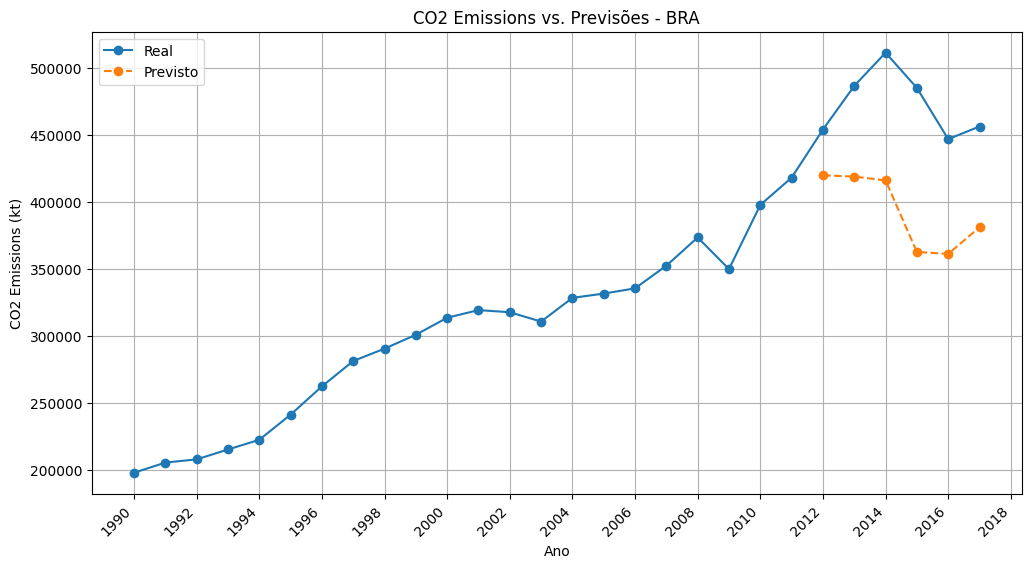

Resultados da Regressão para USA (Treino):
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     5.527
Date:                Wed, 20 Nov 2024   Prob (F-statistic):             0.0128
Time:                        14:48:23   Log-Likelihood:                -305.37
No. Observations:                  22   AIC:                             616.7
Df Residuals:                      19   BIC:                             620.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

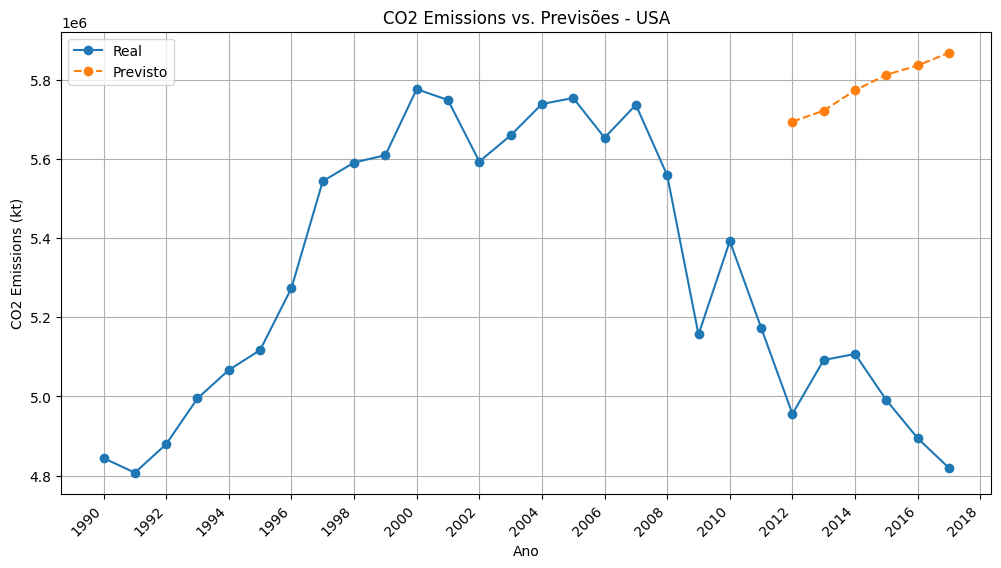

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Carregar os datasets (inclua aqui o código de carregamento dos seus datasets)
# ... (seu código de carregamento de dados)

# Filtrar para o período 1990-2019, limpeza e conversão (igual ao seu código original)
# ... (seu código de pré-processamento - filtros, merge, pib per capita, etc.)


# Criando o gráfico das emissões (igual ao seu código original)
# ... (seu código do gráfico de emissões)



# Converter 'year' para string ANTES da mescla para evitar problemas
pop_df_selected['year'] = pop_df_selected['year'].astype(str)
pib_df_selected['year'] = pib_df_selected['year'].astype(str)
co2_df_selected['year'] = co2_df_selected['year'].astype(str)


# Mesclar os dataframes de PIB e população
merged_df = pd.merge(pib_df_selected, pop_df_selected, on=['country_name', 'year'], how='inner')




# Calcular o PIB per capita, tratando possíveis divisões por zero
merged_df['gdp_per_capita'] = merged_df['total_gdp'] / merged_df['count'].replace(0, np.nan)  # Substitui 0 por NaN para evitar divisão por zero
# merged_df = merged_df.dropna(subset=['gdp_per_capita'])  # Remove as linhas com PIB per capita = infinity




# Criando um novo dataframe mesclando co2 e os dados populacionais e PIB per capita
merged_df_with_co2 = pd.merge(merged_df, co2_df_selected, on=['country_code', 'country_name', 'year'], how='inner')
# Converter 'year' para inteiro para o statsmodels
merged_df_with_co2['year'] = merged_df_with_co2['year'].astype(int)


# Adicionando os dados de crescimento populacional, tratando valores infinitos
pop_growth = pop_df_selected.copy()
pop_growth['pop_growth'] = pop_growth.groupby('country_name')['count'].pct_change() * 100  # Variação percentual

# Converter 'year' para inteiro para a mesclagem
pop_growth['year'] = pop_growth['year'].astype(int)

# Corrigindo o merge para usar 'left' e evitar perda de dados
merged_df_with_co2 = pd.merge(merged_df_with_co2, pop_growth[['country_name', 'year', 'pop_growth']], on=['country_name', 'year'], how='left')

# Substituindo infinitos por NaN para que o StandardScaler funcione
merged_df_with_co2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Criando o gráfico das emissões (igual ao seu código original)
# ... (seu código do gráfico de emissões)


# Padronizar os dados APÓS o tratamento de NaN e a divisão treino/teste
numerical_cols = ['gdp_per_capita', 'pop_growth', 'value']  # Colunas a serem padronizadas
scaler = StandardScaler()


# Loop da regressão com divisão treino/teste e tratamento de NaN
for country in merged_df_with_co2['country_code'].unique():
    country_df = merged_df_with_co2[merged_df_with_co2['country_code'] == country].copy().reset_index(drop=True)


    # Prepara as variáveis para a regressão, tratando valores NaN em 'gdp_per_capita'
    X = country_df[['gdp_per_capita', 'pop_growth']].fillna(0)  # Substitui NaN por 0 ou outro valor adequado
    y = country_df['value']

    # Divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


    # Padronização dos dados (apenas numéricas)
    X_train[numerical_cols[:-1]] = scaler.fit_transform(X_train[numerical_cols[:-1]]) #padroniza as variáveis preditoras numéricas
    X_test[numerical_cols[:-1]] = scaler.transform(X_test[numerical_cols[:-1]]) #padroniza as variáveis preditoras numéricas

    # Adiciona a constante APÓS a divisão treino/teste e o StandardScaler
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)


    # Ajuste o modelo de regressão apenas com os dados de TREINO
    model = sm.OLS(y_train, X_train).fit()

    # Imprime o resultado da regressão para o treino
    print(f"Resultados da Regressão para {country} (Treino):")
    print(model.summary())



    # Faz as previsões para o conjunto de TESTE
    y_pred = model.predict(X_test)

    # Avaliação do modelo no conjunto de teste
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Métricas de Avaliação para {country} (Teste):")
    print(f"MSE: {mse}")
    print(f"R-quadrado: {r2}")
    print("-" * 30)


    #Plota os resultados
    # Plota os resultados (incluindo os valores reais e previstos)
    plt.figure(figsize=(12, 6))
    plt.plot(country_df['year'], country_df['value'], label='Real', marker='o') #plota os dados reais do dataframe completo

    # Plota as previsões apenas para o conjunto de teste
    plt.plot(country_df.iloc[X_test.index]['year'], y_pred, label='Previsto', linestyle='--', marker='o')
    plt.title(f'CO2 Emissions vs. Previsões - {country}')
    plt.xlabel('Ano')
    plt.ylabel('CO2 Emissions (kt)')
    plt.legend()

    # Ajustando os ticks do eixo x para melhor visualização (de 2 em 2 anos)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
    plt.xticks(rotation=45, ha='right') 

    plt.grid(True)
    plt.show()
    
    # ... (seu código de análise e interpretação dos resultados, usando Markdown)

4. Analisando os dados globais de 1960 a 2021, existe uma correlação entre a variação anual do PIB e a variação anual das emissões de CO2? Esta correlação se mantém consistente ao longo do tempo e em diferentes grupos de renda?

Correlação geral entre variação do PIB e variação de CO2: 0.04
Correlação para o grupo de renda 'Ingreso alto': 0.02
Correlação para o grupo de renda 'Países de ingreso bajo': 0.03
Correlação para o grupo de renda 'Países de ingreso mediano bajo': 0.09
Correlação para o grupo de renda 'Ingreso mediano alto': 0.10
Correlação para o grupo de renda 'No clasificado': 0.12


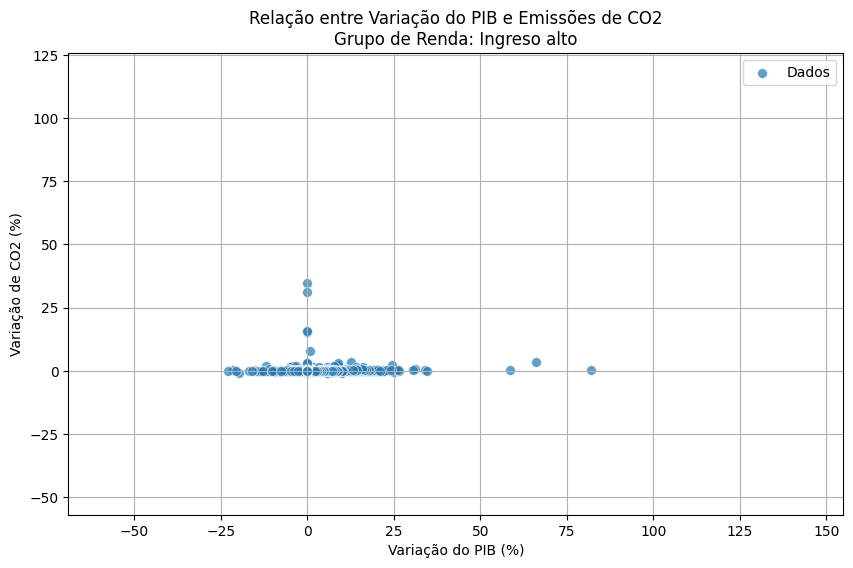

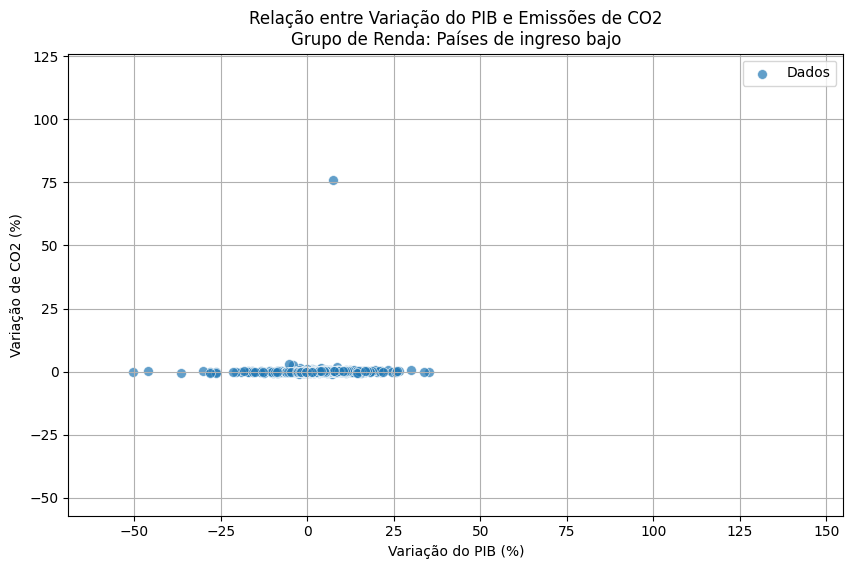

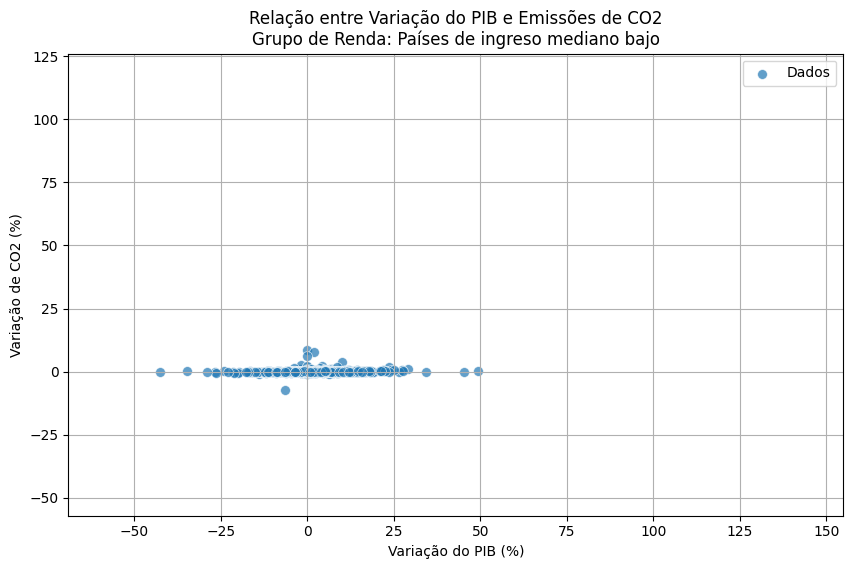

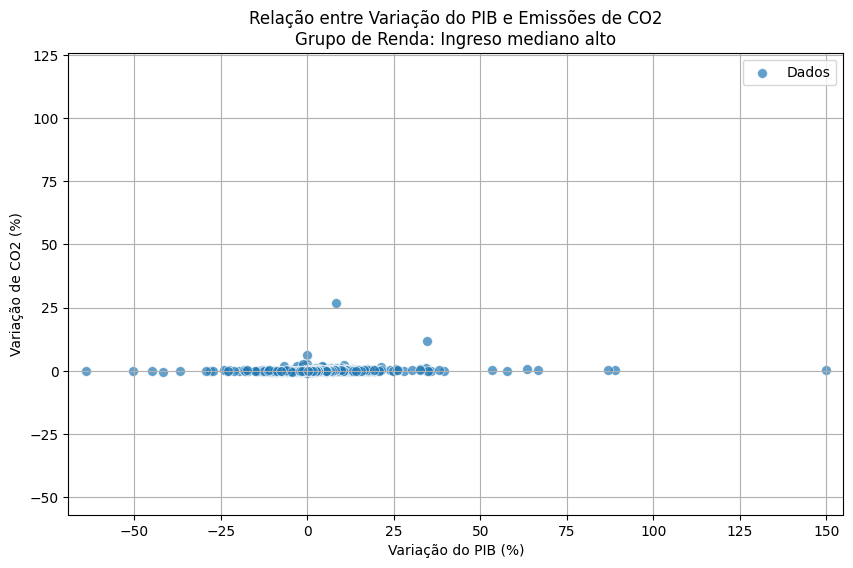

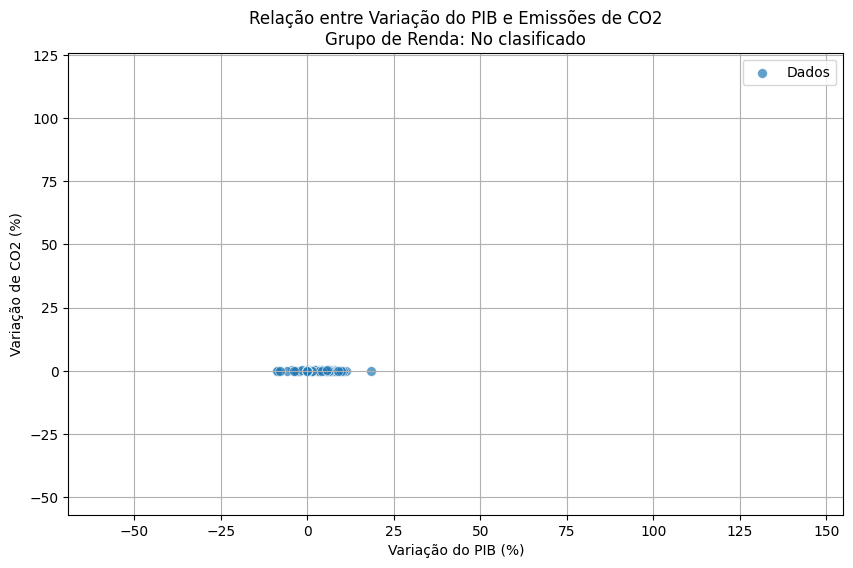

In [42]:
import pandas as pd
import numpy as np

# Garantir que a coluna `gdp_variation` não tenha valores inválidos
pib_df['gdp_variation'] = pib_df['gdp_variation'].replace([np.inf, -np.inf], np.nan)

# Filtrar dados válidos para emissões de CO2
co2_df['value'] = co2_df['value'].replace([np.inf, -np.inf], np.nan)

# Converter 'year' para string ANTES da mescla para evitar problemas
pop_df['year'] = pop_df['year'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)
co2_df['year'] = co2_df['year'].astype(str)

# Mesclar os datasets de PIB e CO2 com base no país e ano
merged_df = pd.merge(pib_df, co2_df, on=['country_code', 'year'], how='inner')

# Garantir que as colunas necessárias estejam completas
merged_df = merged_df.dropna(subset=['gdp_variation', 'value'])

# Calcular a variação anual das emissões de CO2
merged_df['co2_variation'] = merged_df.groupby('country_code')['value'].pct_change()
merged_df['co2_variation'] = merged_df['co2_variation'].replace([np.inf, -np.inf], np.nan)

# Remover linhas onde `co2_variation` seja NaN após o cálculo
merged_df = merged_df.dropna(subset=['co2_variation'])

# Correlação geral
correlation_general = merged_df['gdp_variation'].corr(merged_df['co2_variation'])
print(f"Correlação geral entre variação do PIB e variação de CO2: {correlation_general:.2f}")

# Análise por grupo de renda
income_groups = merged_df['income_group'].unique()
for group in income_groups:
    df_group = merged_df[merged_df['income_group'] == group]

    if df_group.shape[0] > 1:
        # Verificar variação nos dados
        if df_group['gdp_variation'].std() == 0 or df_group['co2_variation'].std() == 0:
            print(f"Dados constantes no grupo de renda '{group}', correlação não definida.")
            continue

        # Calcular correlação
        corr = df_group['gdp_variation'].corr(df_group['co2_variation'])
        print(f"Correlação para o grupo de renda '{group}': {corr:.2f}")
    else:
        print(f"Dados insuficientes para calcular a correlação no grupo '{group}'.")


import matplotlib.pyplot as plt
import seaborn as sns

# Definir limites consistentes para os eixos (opcional)
xmin = merged_df['gdp_variation'].min() - 5  # Adicionar uma margem de 5%
xmax = merged_df['gdp_variation'].max() + 5
ymin = merged_df['co2_variation'].min() - 50  # Adicionar uma margem de 50%
ymax = merged_df['co2_variation'].max() + 50

# Gerar scatter plots para cada grupo de renda
income_groups = merged_df['income_group'].unique()

for group in income_groups:
    df_group = merged_df[merged_df['income_group'] == group]

    if not df_group.empty:  # Certificar que há dados para o grupo
        plt.figure(figsize=(10, 6))
        
        # Scatter plot 
        sns.scatterplot(x='gdp_variation', y='co2_variation', data=df_group, alpha=0.7, s=50, label="Dados")
        
        
        # Títulos e legendas
        plt.title(f'Relação entre Variação do PIB e Emissões de CO2\nGrupo de Renda: {group}')
        plt.xlabel('Variação do PIB (%)')
        plt.ylabel('Variação de CO2 (%)')
        
        # Limites dos eixos
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        
        plt.grid(True)
        plt.legend()
        plt.show()


 5. Globalmente, de 1960 a 2017, o crescimento populacional impulsiona o aumento das emissões de CO2 per capita? Existem diferenças regionais ou por nível de renda nessa relação?

Correlação global entre crescimento populacional e emissões de CO2 per capita: 0.07


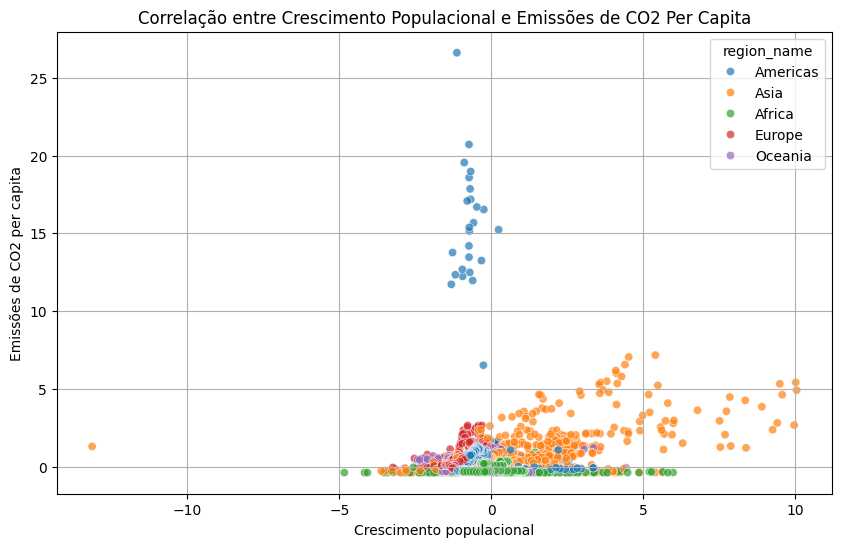

Correlação para a região 'Americas': -0.12
Correlação para a região 'Asia': 0.56
Correlação para a região 'Africa': -0.03
Correlação para a região 'Europe': 0.13
Correlação para a região 'Oceania': -0.10


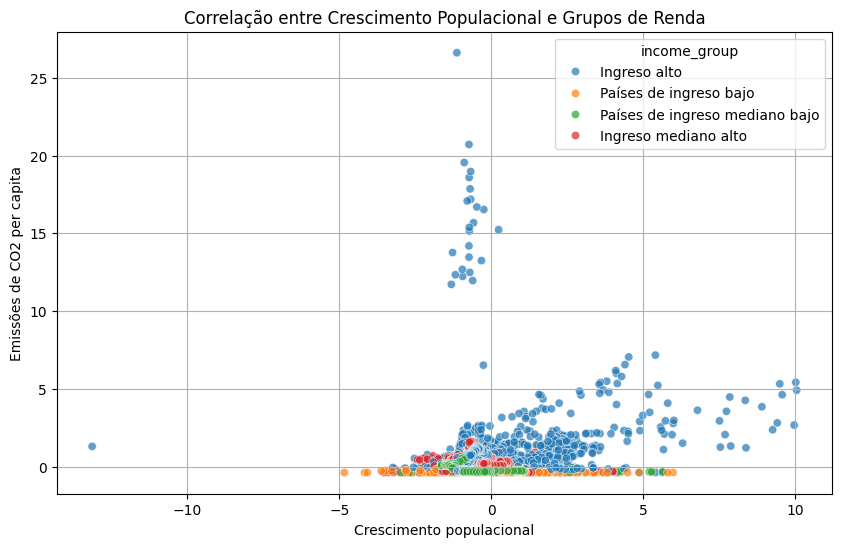

Correlação para a região 'Ingreso alto': 0.22
Correlação para a região 'Países de ingreso bajo': -0.01
Correlação para a região 'Países de ingreso mediano bajo': -0.21
Correlação para a região 'Ingreso mediano alto': -0.17


"\n**Análise dos Resultados (Markdown):**\n\n**Correlação Global:** A correlação global entre o crescimento populacional e as emissões de CO2 per capita é (insira o valor aqui).  Isso indica uma relação (positiva/negativa/fraca) entre as variáveis. O gráfico de dispersão mostra... (descreva o gráfico e os padrões ou tendências que você observa).\n\n**Correlação por Região:** (Para cada região, insira o valor da correlação e explique as diferenças ou semelhanças encontradas, considerando o contexto de cada região. Ex: A região '...' apresentou uma correlação de ..., indicando...). Adicione scatterplots com as emissões per capita ao longo dos anos e o crescimento populacional como hue.\n\n**Correlação por Grupo de Renda:** (Para cada grupo de renda, insira o valor da correlação e explique as diferenças ou semelhanças encontradas, considerando o contexto de cada grupo. Ex: O grupo '...' apresentou uma correlação de ..., indicando...). Adicione scatterplots com as emissões per capita ao lo

In [51]:
# Tratar valores ausentes e converter 'year' para numérico
co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce').astype(int) # Converte para numérico e depois para inteiro
pop_df['year'] = pd.to_numeric(pop_df['year'], errors='coerce').astype(int)
pib_df['year'] = pd.to_numeric(pib_df['year'], errors='coerce').astype(int)



co2_df = co2_df.dropna()
pop_df = pop_df.dropna()
pib_df = pib_df.dropna()

# Converter para string para a mesclagem
pop_df['year'] = pop_df['year'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)
co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce').astype(str)

# Mesclar os dataframes
merged_df = pd.merge(co2_df, pop_df, on=['country_name', 'year'], how='inner')
merged_df = pd.merge(merged_df, pib_df, on=['country_code', 'country_name', 'year'], how='inner')

# Converter 'year' de volta para inteiro
merged_df['year'] = merged_df['year'].astype(int)

# Calcular as emissões de CO2 per capita
merged_df['co2_per_capita'] = merged_df['value'] / merged_df['count']
merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['co2_per_capita']) #Remove as linhas que ficaram com co2_per_capita = infinity.



# Calcular o crescimento populacional anual (%)
# merged_df = merged_df.dropna()
merged_df['pop_growth'] = merged_df.groupby('country_name')['count'].pct_change() * 100

# Remover as linhas com valores NaN no crescimento populacional (primeiro ano de cada país)
merged_df = merged_df.dropna(subset=['pop_growth'])



# Correlação global entre crescimento populacional e emissões de CO2 per capita
correlation_global = merged_df['pop_growth'].corr(merged_df['co2_per_capita'])
print(f"Correlação global entre crescimento populacional e emissões de CO2 per capita: {correlation_global:.2f}")


# Padronizar os dados
scaler = StandardScaler()
merged_df[['pop_growth', 'co2_per_capita']] = scaler.fit_transform(merged_df[['pop_growth', 'co2_per_capita']])

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pop_growth', y='co2_per_capita', data=merged_df, hue='region_name', alpha=0.7)
plt.title("Correlação entre Crescimento Populacional e Emissões de CO2 Per Capita")
plt.xlabel('Crescimento populacional')
plt.ylabel('Emissões de CO2 per capita')
plt.grid(True)
plt.show()

# Correlação por região
regions = merged_df['region_name'].unique()
for region in regions:
    df_region = merged_df[merged_df['region_name'] == region]
    if df_region.shape[0] > 1: # Verifica se há mais de 1 dado
        correlation_region = df_region['pop_growth'].corr(df_region['co2_per_capita'])
        print(f"Correlação para a região '{region}': {correlation_region:.2f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pop_growth', y='co2_per_capita', data=merged_df, hue='income_group', alpha=0.7)
plt.title("Correlação entre Crescimento Populacional e Grupos de Renda")
plt.xlabel('Crescimento populacional')
plt.ylabel('Emissões de CO2 per capita')
plt.grid(True)
plt.show()

# Correlação por região
groups = merged_df['income_group'].unique()
for group in groups:
    df_group = merged_df[merged_df['income_group'] == group]
    if df_group.shape[0] > 1: # Verifica se há mais de 1 dado
        correlation_group = df_group['pop_growth'].corr(df_group['co2_per_capita'])
        print(f"Correlação para a região '{group}': {correlation_group:.2f}")



'''
**Análise dos Resultados (Markdown):**

**Correlação Global:** A correlação global entre o crescimento populacional e as emissões de CO2 per capita é (insira o valor aqui).  Isso indica uma relação (positiva/negativa/fraca) entre as variáveis. O gráfico de dispersão mostra... (descreva o gráfico e os padrões ou tendências que você observa).

**Correlação por Região:** (Para cada região, insira o valor da correlação e explique as diferenças ou semelhanças encontradas, considerando o contexto de cada região. Ex: A região '...' apresentou uma correlação de ..., indicando...). Adicione scatterplots com as emissões per capita ao longo dos anos e o crescimento populacional como hue.

**Correlação por Grupo de Renda:** (Para cada grupo de renda, insira o valor da correlação e explique as diferenças ou semelhanças encontradas, considerando o contexto de cada grupo. Ex: O grupo '...' apresentou uma correlação de ..., indicando...). Adicione scatterplots com as emissões per capita ao longo dos anos e o crescimento populacional como hue.

Lembre-se de que correlação não implica causalidade.  É importante considerar outros fatores que podem influenciar tanto o crescimento populacional quanto as emissões de CO2 per capita, como desenvolvimento econômico, políticas ambientais, mudanças tecnológicas, etc.
'''

7 - Quais são as tendências globais de emissões de CO2 per capita entre 1960 e 2021, e como essas tendências variam entre países de alta, média e baixa renda? Esta questão analisa tendências globais e permite comparações por grupos de renda.

Correlação global entre crescimento populacional e emissões de CO2 per capita: 0.07


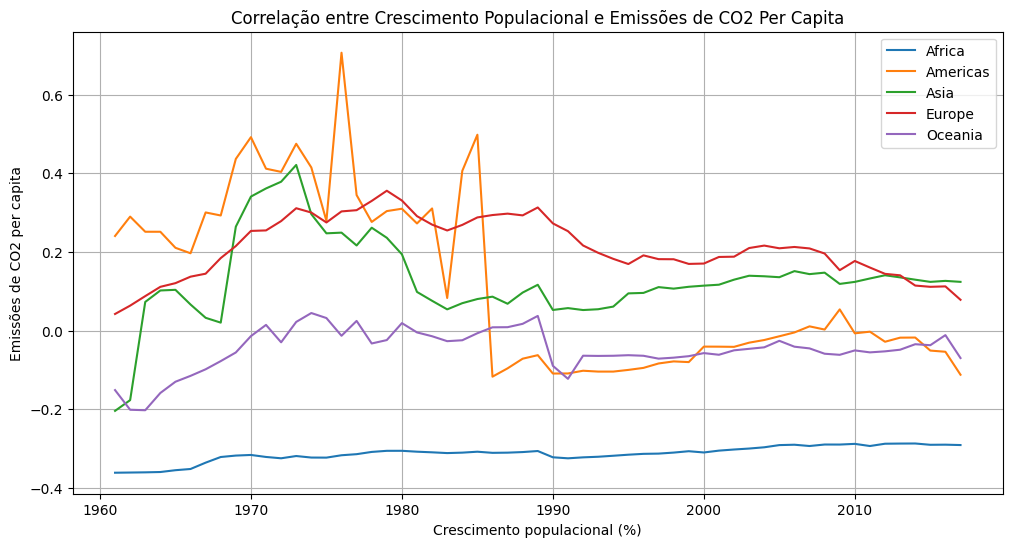

In [14]:


# Carregar os datasets
co2_df = pd.read_csv('co2_emissions_kt_by_country.csv')
pop_df = pd.read_csv('population_total_long.csv')
pib_df = pd.read_csv('countries_gdp_hist.csv', delimiter=';')

# Pré-processamento dos dados
def preprocess_data(co2_df, pop_df, pib_df, start_year=1960, end_year=2019):
    # Renomear colunas do pop_df
    pop_df.rename(columns={
        'Country Name': 'country_name',
        'Year': 'year',
        'Count': 'count'
    }, inplace=True)

    # Converter 'year' para inteiro e tratar valores ausentes
    for df in [co2_df, pop_df, pib_df]:
        df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

    # Tratar valores infinitos no pib_df
    pib_df['gdp_variation'] = pib_df['gdp_variation'].replace([np.inf, -np.inf], np.nan)


    # Filtrar para o período especificado
    co2_df = co2_df[(co2_df['year'] >= start_year) & (co2_df['year'] <= end_year)]
    pop_df = pop_df[(pop_df['year'] >= start_year) & (pop_df['year'] <= end_year)]
    pib_df = pib_df[(pib_df['year'] >= start_year) & (pib_df['year'] <= end_year)]

     # Renomear 'United States of America' para 'United States' (CORRIGIDO)
    pib_df['country_name'] = pib_df['country_name'].replace('United States of America', 'United States')


    # Converter 'year' para string para o merge
    pop_df['year'] = pop_df['year'].astype(str)
    pib_df['year'] = pib_df['year'].astype(str)
    co2_df['year'] = co2_df['year'].astype(str)



    return co2_df, pop_df, pib_df



# Pré-processar os dados para a pergunta 7 (1960-2021)
co2_df_proc, pop_df_proc, pib_df_proc = preprocess_data(co2_df, pop_df, pib_df, end_year=2021) # Filtrar até 2021


# Mesclar DataFrames, calcular emissões per capita e tratar infinitos
merged_df = pd.merge(co2_df_proc, pop_df_proc, on=['country_name', 'year'], how='inner')
merged_df = pd.merge(merged_df, pib_df_proc, on=['country_code', 'country_name', 'year'], how='inner')


merged_df['year'] = merged_df['year'].astype(int)
merged_df['co2_per_capita'] = (merged_df['value'] / merged_df['count']).replace([np.inf, -np.inf], np.nan)

# Remover linhas com valores ausentes em 'co2_per_capita'
merged_df.dropna(subset=['co2_per_capita'], inplace=True)


# Calcular e plotar a correlação (função sem alterações)

# Exemplo de implementação da função
def plot_correlation(merged_df, group_column, title, xlabel, ylabel):
    import matplotlib.pyplot as plt

    # Agrupar por 'group_column' e calcular médias
    grouped = merged_df.groupby([group_column, 'year'])[['co2_per_capita']].mean().reset_index()

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    for group in grouped[group_column].unique():
        group_data = grouped[grouped[group_column] == group]
        plt.plot(group_data['year'], group_data['co2_per_capita'], label=group)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()







merged_df['pop_growth'] = merged_df.groupby('country_name')['count'].pct_change() * 100
merged_df = merged_df.dropna(subset=['pop_growth'])

correlation_global = merged_df['pop_growth'].corr(merged_df['co2_per_capita'])
print(f"Correlação global entre crescimento populacional e emissões de CO2 per capita: {correlation_global:.2f}")


# Padronizar os dados para o gráfico de dispersão
scaler = StandardScaler()
merged_df[['pop_growth', 'co2_per_capita']] = scaler.fit_transform(merged_df[['pop_growth', 'co2_per_capita']])

# Criar e exibir o gráfico de dispersão
plot_correlation(merged_df, 'region_name', "Correlação entre Crescimento Populacional e Emissões de CO2 Per Capita", 'Crescimento populacional (%)', 'Emissões de CO2 per capita')

8 - Considerando os dados de 1960 a 2021, as emissões de CO2 totais seguem um padrão de crescimento linear ou exponencial? Como o tipo de crescimento varia em diferentes grupos de países (por exemplo, países da OCDE vs. países em desenvolvimento)? Essa questão investiga o padrão de crescimento das emissões a nível global e regional.
Impactos Econômicos e Ambientais:

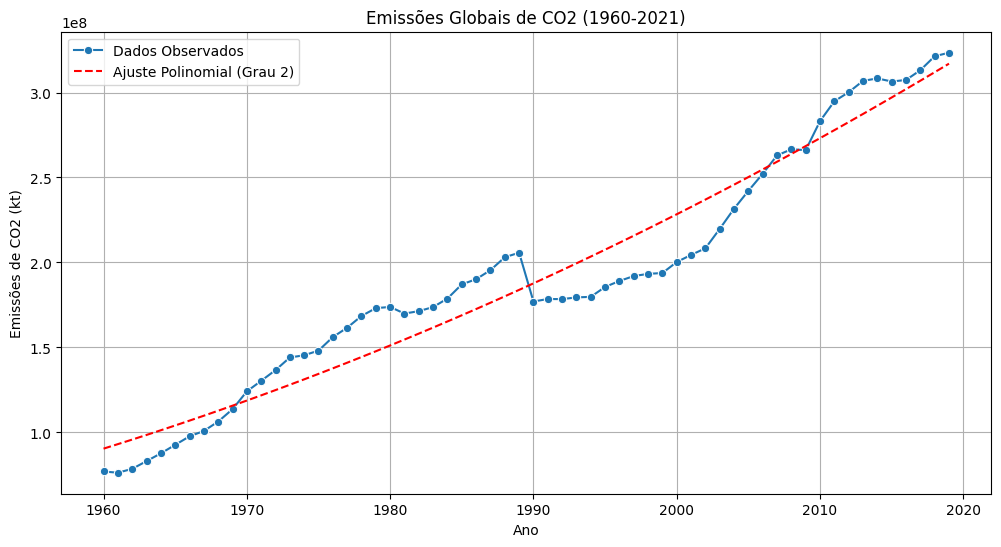

R-quadrado (Polinomial): 0.9395760520456725


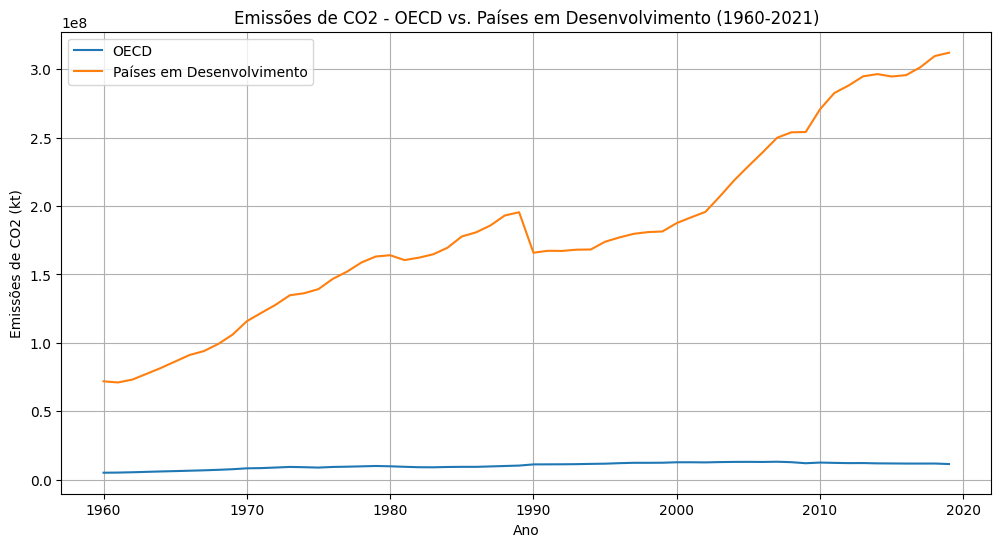

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- Código restante ---

def preprocess_data(co2_df, pop_df, pib_df, start_year=1960, end_year=2019):
    return co2_df, pop_df, pib_df

def regress(X, y, country, test_size=0.3):
    return model

# --- Carregamento e pré-processamento ---
co2_df = pd.read_csv('co2_emissions_kt_by_country.csv')
pop_df = pd.read_csv('population_total_long.csv')
pib_df = pd.read_csv('countries_gdp_hist.csv', delimiter=';')

co2_df_proc, pop_df_proc, pib_df_proc = preprocess_data(co2_df, pop_df, pib_df, end_year=2021)


# --- Análise da pergunta 8 ---

# 1. Emissões Globais e Padrão de Crescimento
global_emissions = co2_df_proc.groupby('year')['value'].sum().reset_index()

# Converter 'year' para numérico para a regressão
global_emissions['year'] = pd.to_numeric(global_emissions['year'])

# Ajustar modelo polinomial (grau 2 - aproximação exponencial)
X = global_emissions['year'].values.reshape(-1, 1)
y = global_emissions['value'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression().fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', data=global_emissions, marker='o', label="Dados Observados")
plt.plot(X, y_pred_poly, label='Ajuste Polinomial (Grau 2)', color='red', linestyle='--')
plt.title('Emissões Globais de CO2 (1960-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular R-quadrado para o ajuste polinomial
r2_poly = r2_score(y, y_pred_poly)
print(f"R-quadrado (Polinomial): {r2_poly}")


# 2. Comparação OECD vs. Países em Desenvolvimento
oecd_countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA']

# Certifique-se que 'country_code' é string
co2_df_proc['country_code'] = co2_df_proc['country_code'].astype(str)

oecd_emissions = co2_df_proc[co2_df_proc['country_code'].isin(oecd_countries)].groupby('year')['value'].sum().reset_index()
developing_emissions = co2_df_proc[~co2_df_proc['country_code'].isin(oecd_countries)].groupby('year')['value'].sum().reset_index()

# Converter 'year' para numérico para a plotagem
oecd_emissions['year'] = pd.to_numeric(oecd_emissions['year'])
developing_emissions['year'] = pd.to_numeric(developing_emissions['year'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', data=oecd_emissions, label='OECD')
sns.lineplot(x='year', y='value', data=developing_emissions, label='Países em Desenvolvimento')

plt.title('Emissões de CO2 - OECD vs. Países em Desenvolvimento (1960-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.legend()
plt.grid(True)
plt.show()